In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv('data_2class_pKi_Lipinski.csv')
df


,ChEMBL ID,Smiles,Canonical_Smiles,bioactivity_class,pKi,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL567175,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,Oc1ccc2c3c1O[C@@H]1[C@@]43CCN([C@H](C2)[C@]4(O...,active,10.000000,414.505,3.57260,3.0,4.0
1,CHEMBL2113666,CN1CC[C@]23c4c5cccc4O[C@H]2C(=O)CC[C@@]3(NC(=O...,O=C(N[C@]12CCC(=O)[C@H]3[C@]42CCN([C@@H]1Cc1c4...,active,10.000000,448.950,3.53030,1.0,4.0
2,CHEMBL1649941,CCCC[C@@H](NC(=O)[C@@H](N)Cc1c(C)cc(O)cc1C)C(=...,CCCC[C@H](C(=O)NCC(=O)N[C@H](C(=O)N1CCC(CC1)N(...,active,10.000000,775.391,4.48514,5.0,7.0
3,CHEMBL334715,N=C(N)NCCC[C@@H](NC(=O)c1cccc2c3c([nH]c12)[C@@...,NC(=N)NCCC[C@H](C(=O)O)NC(=O)c1cccc2c1[nH]c1c2...,active,10.000000,614.703,2.01887,8.0,7.0
4,CHEMBL3785854,Oc1ccc2c(c1)[C@]13CCN(CC4CC4)[C@@H](C2)[C@]1(O...,Oc1ccc2c(c1)[C@@]13CCN([C@@H](C2)[C@]3(O)Cc2c(...,active,10.000000,400.522,3.68160,3.0,3.0
...,...,...,...,...,...,...,...,...,...
2946,CHEMBL3698762,O=c1c(NC(CO)CO)nc2ccccc2n1C1CCN(C2CCCCCCC2)CC1,OCC(Nc1nc2ccccc2n(c1=O)C1CCN(CC1)C1CCCCCCC1)CO,inactive,4.064397,428.577,2.91140,3.0,7.0
2947,CHEMBL1076554,Cc1cccc(O)c1C(=O)C1=CCCN2CCC[C@@H]12,Cc1cccc(c1C(=O)C1=CCCN2[C@H]1CCC2)O,inactive,4.026872,257.333,2.67782,1.0,3.0
2948,CHEMBL3695269,NC(=O)[C@H](CO)Nc1nc2ccccc2n(C2CCN(C3CCCCCCC3)...,OC[C@@H](C(=O)N)Nc1nc2ccccc2n(c1=O)C1CCN(CC1)C...,inactive,4.017715,441.576,2.40440,3.0,7.0
2949,CHEMBL233535,NCc1ccccc1C1(O)CCN(CC2CCCCCC2)CC1,NCc1ccccc1C1(O)CCN(CC1)CC1CCCCCC1,inactive,4.002155,316.489,3.39910,2.0,3.0


In [21]:
selection = ['ChEMBL ID', 'LogP']
df_LogP = df[selection]
df_LogP

,ChEMBL ID,LogP
0,CHEMBL567175,3.57260
1,CHEMBL2113666,3.53030
2,CHEMBL1649941,4.48514
3,CHEMBL334715,2.01887
4,CHEMBL3785854,3.68160
...,...,...
2946,CHEMBL3698762,2.91140
2947,CHEMBL1076554,2.67782
2948,CHEMBL3695269,2.40440
2949,CHEMBL233535,3.39910


In [22]:
df_desc_X = df_LogP
df_desc_X

,ChEMBL ID,LogP
0,CHEMBL567175,3.57260
1,CHEMBL2113666,3.53030
2,CHEMBL1649941,4.48514
3,CHEMBL334715,2.01887
4,CHEMBL3785854,3.68160
...,...,...
2946,CHEMBL3698762,2.91140
2947,CHEMBL1076554,2.67782
2948,CHEMBL3695269,2.40440
2949,CHEMBL233535,3.39910


In [25]:
df_desc_X = df_LogP.drop(columns=['ChEMBL ID'])
df_desc_X

,LogP
0,3.57260
1,3.53030
2,4.48514
3,2.01887
4,3.68160
...,...
2946,2.91140
2947,2.67782
2948,2.40440
2949,3.39910


In [26]:
df_desc_Y = df['pKi']
df_desc_Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [27]:
dataset = pd.concat([df_desc_X,df_desc_Y], axis=1)
dataset

,LogP,pKi
0,3.57260,10.000000
1,3.53030,10.000000
2,4.48514,10.000000
3,2.01887,10.000000
4,3.68160,10.000000
...,...,...
2946,2.91140,4.064397
2947,2.67782,4.026872
2948,2.40440,4.017715
2949,3.39910,4.002155


In [28]:
dataset.to_csv('delta_data_final_2class_logp_pKi.csv', index=False)

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [29]:
df_analysis = pd.read_csv('delta_data_final_2class_logp_pKi.csv')
df_analysis

,LogP,pKi
0,3.57260,10.000000
1,3.53030,10.000000
2,4.48514,10.000000
3,2.01887,10.000000
4,3.68160,10.000000
...,...,...
2946,2.91140,4.064397
2947,2.67782,4.026872
2948,2.40440,4.017715
2949,3.39910,4.002155


In [30]:
X = df_analysis.drop('pKi', axis=1)
X

,LogP
0,3.57260
1,3.53030
2,4.48514
3,2.01887
4,3.68160
...,...
2946,2.91140
2947,2.67782
2948,2.40440
2949,3.39910


In [31]:
Y = df_analysis.pKi
Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [32]:
X.shape

(2951, 1)

In [33]:
Y.shape

(2951,)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
X_train.shape, Y_train.shape

((2360, 1), (2360,))

In [36]:
X_test.shape, Y_test.shape

((591, 1), (591,))

In [37]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.20270279942882663

In [38]:
Y_pred = model.predict(X_test)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

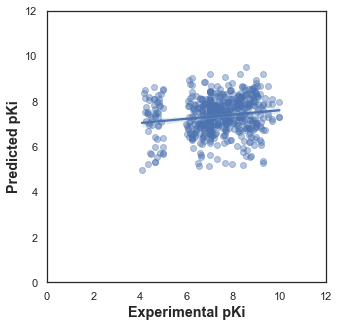

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [40]:
plt.savefig('plot_LogP_pKi.pdf')

<Figure size 432x288 with 0 Axes>

In [41]:
selection_HD = ['ChEMBL ID', 'NumHDonors']
df_HD = df[selection_HD]
df_HD   

,ChEMBL ID,NumHDonors
0,CHEMBL567175,3.0
1,CHEMBL2113666,1.0
2,CHEMBL1649941,5.0
3,CHEMBL334715,8.0
4,CHEMBL3785854,3.0
...,...,...
2946,CHEMBL3698762,3.0
2947,CHEMBL1076554,1.0
2948,CHEMBL3695269,3.0
2949,CHEMBL233535,2.0


In [42]:
df_HD_X = df_HD
df_HD_X

,ChEMBL ID,NumHDonors
0,CHEMBL567175,3.0
1,CHEMBL2113666,1.0
2,CHEMBL1649941,5.0
3,CHEMBL334715,8.0
4,CHEMBL3785854,3.0
...,...,...
2946,CHEMBL3698762,3.0
2947,CHEMBL1076554,1.0
2948,CHEMBL3695269,3.0
2949,CHEMBL233535,2.0


In [43]:
df_HD_X = df_HD.drop(columns=['ChEMBL ID'])
df_HD_X

,NumHDonors
0,3.0
1,1.0
2,5.0
3,8.0
4,3.0
...,...
2946,3.0
2947,1.0
2948,3.0
2949,2.0


In [46]:
df_HD_Y = df['pKi']
df_HD_Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [47]:
dataset_HD = pd.concat([df_HD_X,df_HD_Y], axis=1)
dataset_HD

,NumHDonors,pKi
0,3.0,10.000000
1,1.0,10.000000
2,5.0,10.000000
3,8.0,10.000000
4,3.0,10.000000
...,...,...
2946,3.0,4.064397
2947,1.0,4.026872
2948,3.0,4.017715
2949,2.0,4.002155


In [49]:
dataset.to_csv('delta_data_final_2class_HD_pKi.csv', index=False)

In [50]:
df_analysis_HD = pd.read_csv('delta_data_final_2class_HD_pKi.csv')
df_analysis_HD

,LogP,pKi
0,3.57260,10.000000
1,3.53030,10.000000
2,4.48514,10.000000
3,2.01887,10.000000
4,3.68160,10.000000
...,...,...
2946,2.91140,4.064397
2947,2.67782,4.026872
2948,2.40440,4.017715
2949,3.39910,4.002155


In [51]:
X_HD = df_analysis_HD.drop('pKi', axis=1)
X_HD

,LogP
0,3.57260
1,3.53030
2,4.48514
3,2.01887
4,3.68160
...,...
2946,2.91140
2947,2.67782
2948,2.40440
2949,3.39910


In [52]:
Y_HD = df_analysis_HD.pKi
Y_HD

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [53]:
X_HD.shape


(2951, 1)

In [54]:
Y_HD.shape


(2951,)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X_HD, Y_HD, test_size=0.2)

In [56]:
X_train.shape, Y_train.shape

((2360, 1), (2360,))

In [57]:
X_test.shape, Y_test.shape

((591, 1), (591,))

In [58]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.193740401204054

In [59]:
Y_pred = model.predict(X_test)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

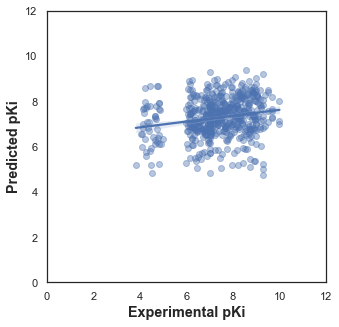

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [61]:
plt.savefig('plot_HD_pKi.pdf')

<Figure size 432x288 with 0 Axes>

In [62]:
selection_HA = ['ChEMBL ID', 'NumHAcceptors']
df_HA = df[selection_HA]
df_HA   

,ChEMBL ID,NumHAcceptors
0,CHEMBL567175,4.0
1,CHEMBL2113666,4.0
2,CHEMBL1649941,7.0
3,CHEMBL334715,7.0
4,CHEMBL3785854,3.0
...,...,...
2946,CHEMBL3698762,7.0
2947,CHEMBL1076554,3.0
2948,CHEMBL3695269,7.0
2949,CHEMBL233535,3.0


In [63]:
df_HA_X = df_HA
df_HA_X

,ChEMBL ID,NumHAcceptors
0,CHEMBL567175,4.0
1,CHEMBL2113666,4.0
2,CHEMBL1649941,7.0
3,CHEMBL334715,7.0
4,CHEMBL3785854,3.0
...,...,...
2946,CHEMBL3698762,7.0
2947,CHEMBL1076554,3.0
2948,CHEMBL3695269,7.0
2949,CHEMBL233535,3.0


In [64]:
df_HA_X = df_HA.drop(columns=['ChEMBL ID'])
df_HA_X

,NumHAcceptors
0,4.0
1,4.0
2,7.0
3,7.0
4,3.0
...,...
2946,7.0
2947,3.0
2948,7.0
2949,3.0


In [65]:
df_HA_Y = df['pKi']
df_HA_Y

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [66]:
dataset_HA = pd.concat([df_HA_X,df_HA_Y], axis=1)
dataset_HA

,NumHAcceptors,pKi
0,4.0,10.000000
1,4.0,10.000000
2,7.0,10.000000
3,7.0,10.000000
4,3.0,10.000000
...,...,...
2946,7.0,4.064397
2947,3.0,4.026872
2948,7.0,4.017715
2949,3.0,4.002155


In [67]:
dataset.to_csv('delta_data_final_2class_HA_pKi.csv', index=False)

In [68]:
df_analysis_HA = pd.read_csv('delta_data_final_2class_HA_pKi.csv')
df_analysis_HA

,LogP,pKi
0,3.57260,10.000000
1,3.53030,10.000000
2,4.48514,10.000000
3,2.01887,10.000000
4,3.68160,10.000000
...,...,...
2946,2.91140,4.064397
2947,2.67782,4.026872
2948,2.40440,4.017715
2949,3.39910,4.002155


In [69]:
X_HA = df_analysis_HA.drop('pKi', axis=1)
X_HA

,LogP
0,3.57260
1,3.53030
2,4.48514
3,2.01887
4,3.68160
...,...
2946,2.91140
2947,2.67782
2948,2.40440
2949,3.39910


In [70]:
Y_HA = df_analysis_HA.pKi
Y_HA

0       10.000000
1       10.000000
2       10.000000
3       10.000000
4       10.000000
          ...    
2946     4.064397
2947     4.026872
2948     4.017715
2949     4.002155
2950     3.822795
Name: pKi, Length: 2951, dtype: float64

In [80]:
X_HA.shape

(2951, 1)

In [81]:
Y_HA.shape

(2951,)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X_HA, Y_HA, test_size=0.2)

In [78]:
X_train.shape, Y_train.shape

((2360, 1), (2360,))

In [79]:
X_test.shape, Y_test.shape

((591, 1), (591,))

In [82]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.19031589938221538

In [83]:
Y_pred = model.predict(X_test)

C:\Users\Zizi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

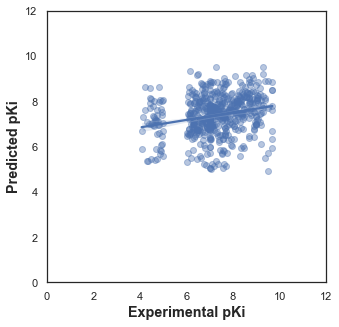

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pKi', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pKi', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [85]:
plt.savefig('plot_HA_pKi.pdf')

<Figure size 432x288 with 0 Axes>